# LGMVIP-DataScience

# Task1-Iris Flowers Classification

## Importing the necessary modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Loading the dataset to dataframe(flr)

In [4]:
flr=pd.read_csv('C:/users/mansurshaik/Downloads/Iris.csv')
flr.head()#shows the top 5rows of the dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Removing the unwanted columns

In [5]:
flr=flr.drop(columns=['Id'])
flr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Shows the stats of the dataframe

In [6]:
flr.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#basic info to display datatype
flr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#getting the species count from dataframe
flr['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Preprocessing the data

In [9]:
#checking for null values
flr.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

<Axes: >

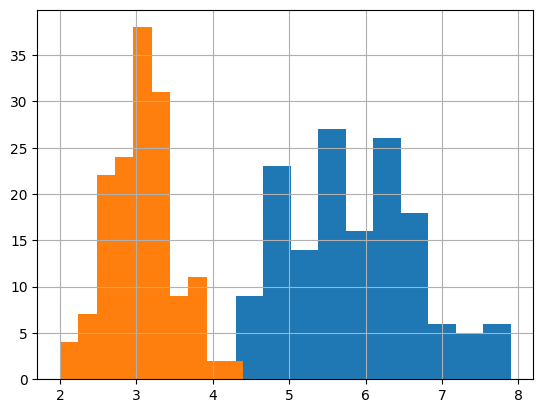

In [10]:
# histograms to represent data in the form of graphs  
flr['SepalLengthCm'].hist()

flr['SepalWidthCm'].hist()


<Axes: >

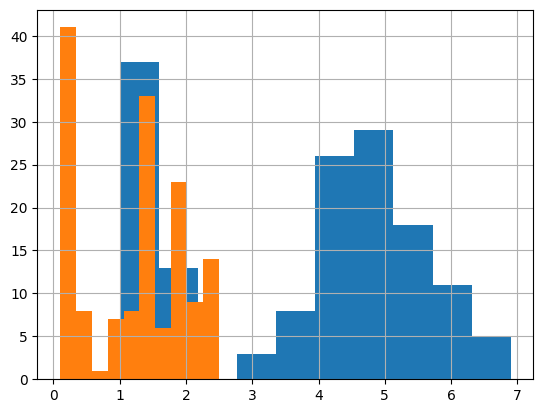

In [11]:
#representing the data in the form of graphs
flr['PetalLengthCm'].hist()

flr['PetalWidthCm'].hist()

In [12]:
#Scatterplot
color=['blue','orange','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']


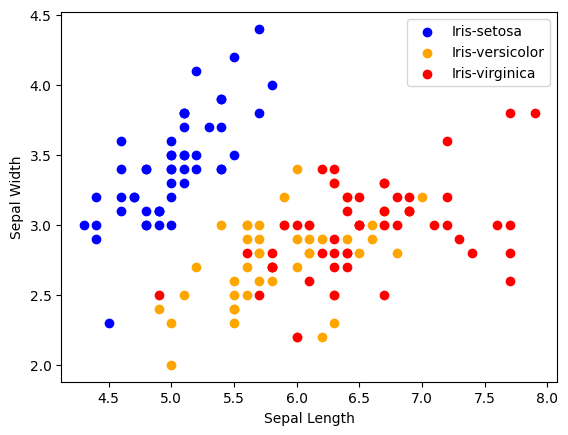

In [13]:
for i in range(3):
    X=flr[flr['Species']==species[i]]
    plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],c=color[i],label=species[i] )
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

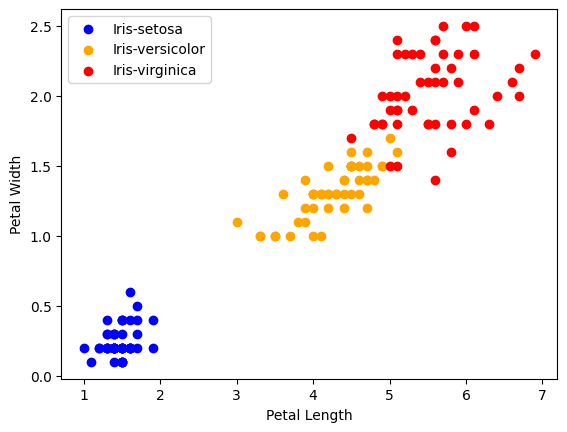

In [14]:

for i in range(3):
    X=flr[flr['Species']==species[i]]
    plt.scatter(X['PetalLengthCm'],X['PetalWidthCm'],c=color[i],label=species[i] )
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

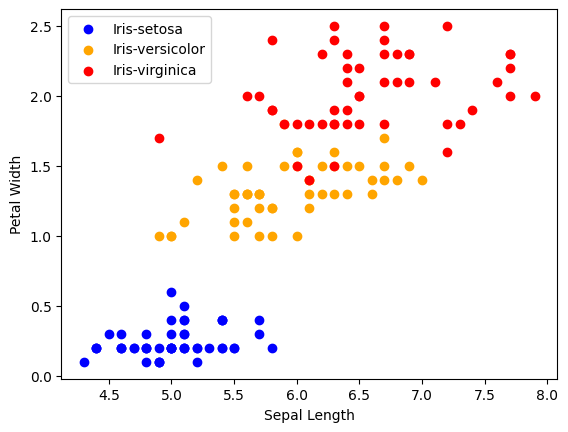

In [15]:

for i in range(3):
    X=flr[flr['Species']==species[i]]
    plt.scatter(X['SepalLengthCm'],X['PetalWidthCm'],c=color[i],label=species[i] )
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

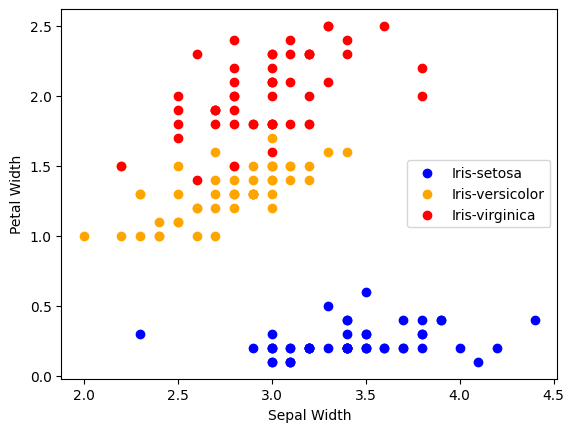

In [16]:

for i in range(3):
    X=flr[flr['Species']==species[i]]
    plt.scatter(X['SepalWidthCm'],X['PetalWidthCm'],c=color[i],label=species[i] )
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [17]:
y=flr['Species']
x=flr.drop('Species',axis=1)

In [19]:
#correlation matrix for iris dataset
flr.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

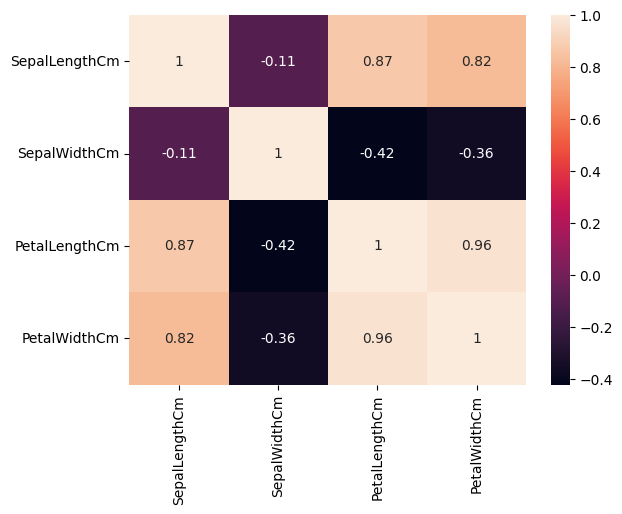

In [20]:
#representing correlation matrix in the form of heatmap graph
sns.heatmap(flr.corr(numeric_only=True),annot=True)

## Encoding categorical data

In [21]:
#LabelEncoder to change the strings into machine readable numbers
labelencoder=LabelEncoder()
flr['Species']=labelencoder.fit_transform(flr['Species'])
flr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
flr.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]>

## Splitting the data into train&test sets

In [23]:
#train-60
#test-40
X=flr.drop(columns=['Species'])
Y=flr['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=45)

## Model Training

In [24]:
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression()
#training the model
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.89      1.00      0.94        17
           2       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

Accuracy Score: 0.9666666666666667


## Predicting the model

In [31]:
#inputing the values of the iris species flower to identify the species of the iris flower
#0-iris-setosa
#1-iris-versicolor
#2-iris-verginica
y_pred=model.predict([[5.9,3.0,5.1,1.8]])
print(*y_pred)

2
